In [19]:
import numpy as np
from itertools import permutations 
import matplotlib.pyplot as plt
import random

norm = np.linalg.norm
dot = np.dot

def get_obj(x):
    return (1 / 2) * (norm(x) ** 2)

def get_grad(x):
    return x

def get_perms(n):
    return list(permutations(range(1, n + 1))) 

def truesort_map(x):
    augmented_x = [(x[i], i) for i in range(0, n)]
    sorted_augmented_x = sorted(augmented_x)
    sort_map = [x[1] for x in (sorted_augmented_x)]
    reverse_sort_map = [0 for i in range(0, n)]
    for i, x in enumerate(sort_map):
        sort_map_index = i
        original_index = x
        reverse_sort_map[x] = i
    return reverse_sort_map
    
def quicksort_map(x, n):
    augmented_x = [(x[i], i) for i in range(0, len(x))]
    pivotvalue = augmented_x[n][0]
    temp = augmented_x[n]
    augmented_x[n] = augmented_x[0]
    augmented_x[0] = temp

    leftmark = 1
    rightmark = len(augmented_x) - 1

    done = False
    while not done:
        while leftmark <= rightmark and augmented_x[leftmark][0] <= pivotvalue:
            leftmark = leftmark + 1

        while augmented_x[rightmark][0] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = augmented_x[leftmark]
            augmented_x[leftmark] = augmented_x[rightmark]
            augmented_x[rightmark] = temp

    temp = augmented_x[0]
    augmented_x[0] = augmented_x[rightmark]
    augmented_x[rightmark] = temp

    sort_map = [augmented_x[i][1] for i in range(0, len(x))]
    return sort_map

def invert_map(x):
    return [len(x) - i for i in x]

plt.style.use('fivethirtyeight')

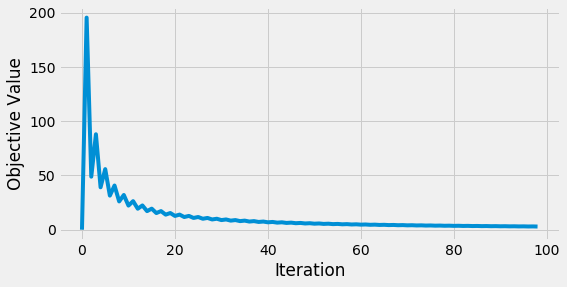

In [46]:
## True Frank Wolfe

n = 101
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
K = 100
current_x = start_x
distances = []
for k in range(1, K):
    # print("CURRENT X: {}".format(current_x))
    distances.append(norm(current_x - start_x))
    gamma = 2 / (k + 2)
    # print("GAMMA: {}".format(gamma))
    
    augmented_x = [(current_x[i], i) for i in range(0, len(current_x))]
    # print("AUGMENTED_X: ".format(augmented_x))
    sorted_augmented_x = sorted(augmented_x)
    sort_map = [x[1] for x in (sorted_augmented_x)]
    # print(sort_map)
    reverse_sort_map = np.array(invert_map(sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))

    # print("ARGMIN: {}".format(reverse_sort_map))
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

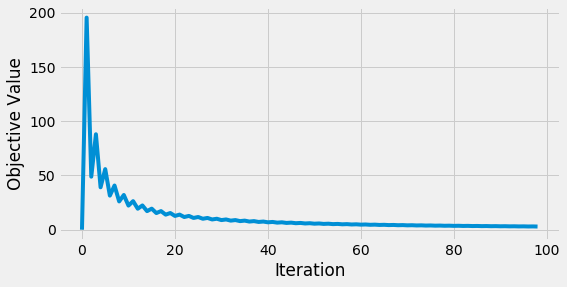

In [45]:
# Approximate K-Select Median Frank Wolfe

import random

n = 101
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
K = 100
current_x = start_x
distances = []
for k in range(1, K):
    # print("CURRENT ITERATION: {}".format(k))
    # print("CURRENT X: {}".format(current_x))
    
    # print("DISTANCE FROM OPT: {}".format(norm(current_x - start_x)))
    distances.append(norm(current_x - start_x))
    gamma = 2 / (k + 2)
    # print("GAMMA: {}".format(gamma))
    
    # argmin approximation
    median = (np.percentile(current_x,50,interpolation='nearest'))
    median_index = np.where(current_x==median)[0][0]
    pivot = median_index
    # print("PIVOT: {}".format(pivot))
    sort_map = quicksort_map(current_x, pivot)
    # print("APPROX SORT MAP {}".format(sort_map))
    reverse_sort_map = np.array(invert_map(sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))
    
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

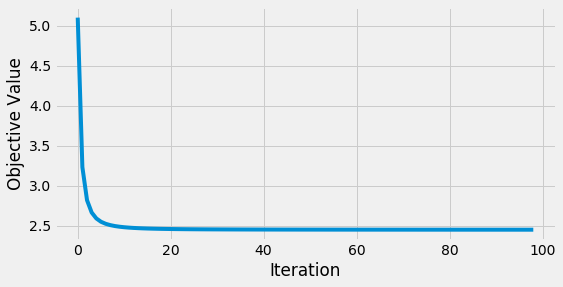

In [44]:
## True Frank Wolfe with Obj ||y - x||

n = 5
K = 100
y = np.array([1, 5, -1, 2, 4])
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
current_x = start_x
distances = []

for k in range(1, K):
    distances.append(norm(current_x - y))
    gamma = 2 / (k + 2)
    gradient = [(current_x[i] - y[i]) / norm(y - current_x) for i in range(0, n)]
    
    augmented_gradient = [(gradient[i], i) for i in range(0, n)]
    sorted_augmented_gradient = sorted(augmented_gradient)
    sort_map = [x[1] for x in (sorted_augmented_gradient)]
    new_sort_map = [0 for i in range(0, n)]
    for i, x in enumerate(sort_map):
        sort_map_index = i
        original_index = x
        new_sort_map[x] = i
    
    reverse_sort_map = np.array(invert_map(new_sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

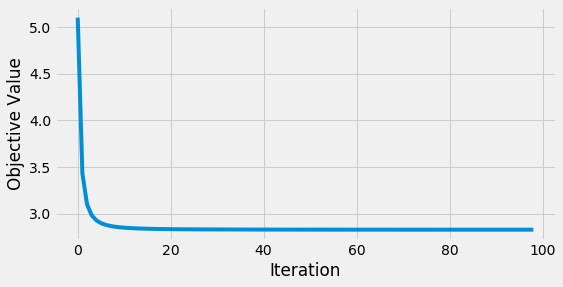

In [41]:
## Approximate Frank Wolfe with Obj ||y - x||

n = 5
K = 100
y = np.array([1, 5, -1, 2, 4])
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
current_x = start_x
distances = []

for k in range(1, K):
    distances.append(norm(current_x - y))
    
    gamma = 2 / (k + 2)
    gradient = [(current_x[i] - y[i]) / norm(y - current_x) for i in range(0, n)]
    
    # argmin approximation
    median = (np.percentile(gradient,50,interpolation='nearest'))
    median_index = np.where(gradient==median)[0][0]
    pivot = median_index
    sort_map = quicksort_map(gradient, pivot)
    
    new_sort_map = [0 for i in range(0, n)]
    for i, x in enumerate(sort_map):
        sort_map_index = i
        original_index = x
        new_sort_map[x] = i
    
    # print(sort_map)
    reverse_sort_map = np.array(invert_map(new_sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))
    
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

In [16]:
def generate_psd(dim):
    matrix = np.array([random.sample(list(range(1, dim + 1)), dim) for i in range(0, dim)])
    matrix_t = np.transpose(matrix)
    psd = np.matmul(matrix, matrix_t)
    return psd

In [20]:
random.seed(0)
A = generate_psd(5)
print(A)
"""
A = [[7.10407156988416, 1.32330216085688, 1.47536266528327, 1.65329199752563, 1.60001710064222, 2.08244696680647], 
[0.690295022686952, 8.87358599431031, 1.0684696809243, 0.634818108226759, 1.30093582580041, 1.70856852399329], 
[1.85595150237816, 1.33598710345914, 11.8397777091197, 1.76953714091604, 2.55953602127672, 2.76884076285983],
[1.56565705346201, 1.03902277187518, 2.16381119304401, 13.7211501292434, 2.27415323719894, 2.75467447917341],
[0.601192276538296, 0.513562911542556, 0.670513649585971, 0.742283056553211, 14.8347952974616, 1.01829192175895],
[1.61734050067176, 0.756412527367887, 1.54602120881239, 1.94368138115662, 1.80771444834702, 17.9285174138453]]

A = [[7.59109377081197, 1.67297244732659, 1.56831393731868, 1.59232242879136, 1.81726097525662, 1.21736660818627], 
[1.30787889148955, 9.30280920333458, 1.28385618770493, 1.93906292265502, 1.79226265548524, 1.1006561709494],
[1.08418793499557, 1.30552042722924, 11.0797713877049, 1.43009614381477, 1.2509183130762, 0.635946124679147], 
[2.23234068490289, 1.95176959456872, 2.35696811940851, 13.8515256135394, 2.46334778446757, 1.40391798563008], 
[1.48801847455624, 2.23547900873405, 1.7442967466019, 1.99850557218222, 15.7584924055714, 0.762980705181352], 
[1.67324926931675, 2.28283380264427, 2.04350087431004, 2.1433312549543, 2.15798335765441, 17.1703509156752]]"""

[[55 46 45 47 48]
 [46 55 42 44 39]
 [45 42 55 54 41]
 [47 44 54 55 42]
 [48 39 41 42 55]]


'\nA = [[7.10407156988416, 1.32330216085688, 1.47536266528327, 1.65329199752563, 1.60001710064222, 2.08244696680647], \n[0.690295022686952, 8.87358599431031, 1.0684696809243, 0.634818108226759, 1.30093582580041, 1.70856852399329], \n[1.85595150237816, 1.33598710345914, 11.8397777091197, 1.76953714091604, 2.55953602127672, 2.76884076285983],\n[1.56565705346201, 1.03902277187518, 2.16381119304401, 13.7211501292434, 2.27415323719894, 2.75467447917341],\n[0.601192276538296, 0.513562911542556, 0.670513649585971, 0.742283056553211, 14.8347952974616, 1.01829192175895],\n[1.61734050067176, 0.756412527367887, 1.54602120881239, 1.94368138115662, 1.80771444834702, 17.9285174138453]]\n\nA = [[7.59109377081197, 1.67297244732659, 1.56831393731868, 1.59232242879136, 1.81726097525662, 1.21736660818627], \n[1.30787889148955, 9.30280920333458, 1.28385618770493, 1.93906292265502, 1.79226265548524, 1.1006561709494],\n[1.08418793499557, 1.30552042722924, 11.0797713877049, 1.43009614381477, 1.2509183130762,

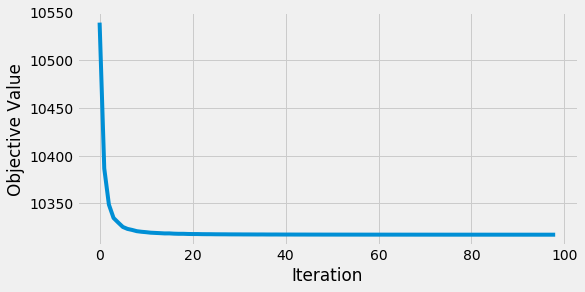

[1.00079208 4.35306931 3.         1.99980198 4.64633663]
10317.252305274964


In [43]:
## True Frank Wolfe with Obj xTAx
n = 5
K = 100
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
current_x = start_x
distances = []

for k in range(1, K):
    distances.append(np.matmul(np.matmul(np.transpose(current_x), A), current_x))
    gamma = 2 / (k + 2)
    gradient = np.matmul(np.transpose(current_x), A + np.transpose(A))
    
    augmented_gradient = [(gradient[i], i) for i in range(0, n)]
    sorted_augmented_gradient = sorted(augmented_gradient)
    sort_map = [x[1] for x in (sorted_augmented_gradient)]
    new_sort_map = [0 for i in range(0, n)]
    for i, x in enumerate(sort_map):
        sort_map_index = i
        original_index = x
        new_sort_map[x] = i
    
    reverse_sort_map = np.array(invert_map(new_sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

print(current_x)
print(distances[-1])

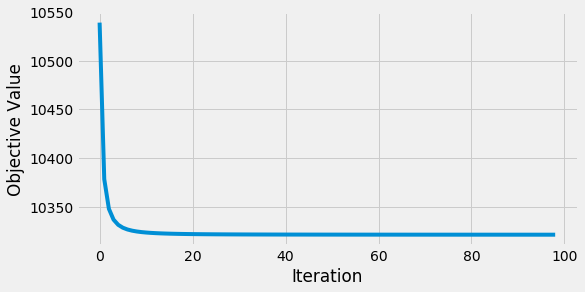

[1.00039604 3.99980198 3.         2.00019802 4.99960396]
10321.029901846752


In [42]:
## True Frank Wolfe with Obj xTAx
n = 5
K = 100
start_x = np.array([(1 + n) / 2 for i in range(0, n)])
current_x = start_x
distances = []

for k in range(1, K):
    distances.append(np.matmul(np.matmul(np.transpose(current_x), A), current_x))
    gamma = 2 / (k + 2)
    gradient = np.matmul(np.transpose(current_x), A + np.transpose(A))
    
    # argmin approximation
    median = (np.percentile(gradient,50,interpolation='nearest'))
    median_index = np.where(gradient==median)[0][0]
    pivot = median_index
    sort_map = quicksort_map(gradient, pivot)
    
    new_sort_map = [0 for i in range(0, n)]
    for i, x in enumerate(sort_map):
        sort_map_index = i
        original_index = x
        new_sort_map[x] = i
    
    reverse_sort_map = np.array(invert_map(new_sort_map))
    # print("REVERSE SORT MAP: {}".format(reverse_sort_map))
    next_x = (1 - gamma) * current_x + (gamma) * reverse_sort_map
    current_x = next_x
    # print()
    
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()

print(current_x)
print(distances[-1])

In [52]:
sort_map = quicksort_map([5, 10, 1, 3, 6, 8, 2, 4, 7, 9], 0)
    
new_sort_map = [0 for i in range(0, 10)]
for i, x in enumerate(sort_map):
    sort_map_index = i
    original_index = x
    new_sort_map[x] = i
    
print(new_sort_map)

[4, 7, 2, 3, 6, 5, 0, 1, 8, 9]


In [54]:
p = [5, 10, 1, 3, 6, 8, 2, 4, 7, 9]
print([p[i] for i in sort_map])

[2, 4, 1, 3, 5, 8, 6, 10, 7, 9]
